## Data Preparation

* Import Library yang akan digunakan

In [1]:
#imoort library yang akan digunakan
import pandas as pd
import numpy as np
#load dataset from GDrive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Load dataset dari google drive

In [2]:
# Load dataset 
df = pd.read_csv('drive/My Drive/DS/Dataset/bank-additional.csv', sep=';')
df.columns = ["age","job","marital","education","default","housing","loan","contact","month","day_of_week","duration","campaign","pdays","previous","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","y"]
df.head(12)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,128,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,290,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,44,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,68,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,170,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [3]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
#Cek type data semua kolom, apakah sudah sesuai atau belum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [5]:
#cek data yang kosong
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
#cek duplikasi data
df.duplicated().sum()

0

In [7]:
df.shape

(4119, 21)

# Menghapus Kolom yang tidak digunakan

In [8]:
df.drop(columns=['contact','day_of_week','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','month'], axis=1, inplace=True)

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,duration,campaign,poutcome,y
0,30,blue-collar,married,basic.9y,no,yes,no,487,2,nonexistent,no
1,39,services,single,high.school,no,no,no,346,4,nonexistent,no
2,25,services,married,high.school,no,yes,no,227,1,nonexistent,no
3,38,services,married,basic.9y,no,unknown,unknown,17,3,nonexistent,no
4,47,admin.,married,university.degree,no,yes,no,58,1,nonexistent,no


**Cek semua isi kolom pada tabel berdasarkan index, sebelum melakukan pelabelan data**

In [10]:
print(df['job'].value_counts().sort_index(),'\n')
print(df['education'].value_counts().sort_index(),'\n')
print(df['marital'].value_counts().sort_index(),'\n')
print(df['default'].value_counts().sort_index(),'\n')
print(df['poutcome'].value_counts().sort_index(),'\n')

admin.           1012
blue-collar       884
entrepreneur      148
housemaid         110
management        324
retired           166
self-employed     159
services          393
student            82
technician        691
unemployed        111
unknown            39
Name: job, dtype: int64 

basic.4y                429
basic.6y                228
basic.9y                574
high.school             921
illiterate                1
professional.course     535
university.degree      1264
unknown                 167
Name: education, dtype: int64 

divorced     446
married     2509
single      1153
unknown       11
Name: marital, dtype: int64 

no         3315
unknown     803
yes           1
Name: default, dtype: int64 

failure         454
nonexistent    3523
success         142
Name: poutcome, dtype: int64 



In [11]:
#copy dataset utama
train = df.copy()
train.head()

,age,job,marital,education,default,housing,loan,duration,campaign,poutcome,y
0,30,blue-collar,married,basic.9y,no,yes,no,487,2,nonexistent,no
1,39,services,single,high.school,no,no,no,346,4,nonexistent,no
2,25,services,married,high.school,no,yes,no,227,1,nonexistent,no
3,38,services,married,basic.9y,no,unknown,unknown,17,3,nonexistent,no
4,47,admin.,married,university.degree,no,yes,no,58,1,nonexistent,no


**Pelabelan data string menjadi angka**

Contoh pada **tabel marital** :
* divorced  = 0  
* married   = 1  
* single    = 2 
* unknown   = 3   

Contoh pada **job** :
* admin         = 0           
* blue-collar   = 1   
* entrepreneur  = 2    
* housemaid     = 3    
* management    = 4    
* retired       = 5    
* self-employed = 6    
* services      = 7    
* student       = 8     
* technician    = 9    
* unemployed    = 10    
* unknown       = 11     

In [12]:
#import library untuk pelabelan
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

train['job'] = le.fit_transform(train['job'])
train['marital'] = le.fit_transform(train['marital'])
train['education'] = le.fit_transform(train['education'])
train['housing'] = le.fit_transform(train['housing'])
train['loan'] = le.fit_transform(train['loan'])
train['y'] = le.fit_transform(train['y'])
train['default'] = le.fit_transform(train['default'])
train['poutcome'] = le.fit_transform(train['poutcome'])
                                    

In [13]:
#Hasil dari pelabelan data
train.head(10)

,age,job,marital,education,default,housing,loan,duration,campaign,poutcome,y
0,30,1,1,2,0,2,0,487,2,1,0
1,39,7,2,3,0,0,0,346,4,1,0
2,25,7,1,3,0,2,0,227,1,1,0
3,38,7,1,2,0,1,1,17,3,1,0
4,47,0,1,6,0,2,0,58,1,1,0
5,32,7,2,6,0,0,0,128,3,0,0
6,32,0,2,6,0,2,0,290,4,1,0
7,41,2,1,6,1,2,0,44,2,1,0
8,31,7,0,5,0,0,0,68,1,0,0
9,35,1,1,2,1,0,0,170,1,1,0


In [14]:
#Membuat sample data untuk testing dan training
x = train.drop('y',1)
y = train.y

#pandas.get_dummies() digunakan untuk manipulasi data. Ini mengubah data kategoris menjadi variabel dummy atau indikator.

In [15]:

x = pd.get_dummies(x)
train = pd.get_dummies(train)

In [16]:
x.sample(10)

,age,job,marital,education,default,housing,loan,duration,campaign,poutcome
1217,30,0,1,6,0,2,2,82,6,1
3283,29,9,2,3,0,0,0,155,2,1
3359,47,1,0,0,0,2,0,149,7,1
26,36,9,0,5,0,0,0,446,1,1
3847,40,1,1,2,0,0,0,231,1,1
4050,27,8,2,3,0,0,2,537,2,0
1568,38,0,0,6,0,0,0,79,3,1
1930,34,9,2,6,0,2,2,38,1,1
71,51,7,1,3,1,2,0,596,3,1
14,29,0,2,3,0,0,0,553,2,1


In [17]:
y.sample(10)

4091    0
2755    0
918     0
815     0
941     0
632     0
3673    0
3191    0
3004    0
1810    0
Name: y, dtype: int64

1 = yes

0 = no

In [18]:
#Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Membagi dataset menjadi data training dan data testing
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=0.2)

* Membagi dataset menjadi data training dan data testing dengan train_test_split
* X_train: Untuk menampung data source yang akan dilatih.
* X_cv: Untuk menampung data target yang akan dilatih.
* y_train: Untuk menampung data source yang akan digunakan untuk testing.
* y_cv: Untuk menampung data target yang akan digunakan untuk testing.

In [19]:
#Random Forest
#Melatih data training dan melakukan prediksi pada set test
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, 
class_weight=None,
                       criterion='gini', max_depth=None, 
max_features='auto',
                       max_leaf_nodes =None, max_samples=None, 
                       min_impurity_decrease=0.0,

                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
n_estimators=100, 
                       n_jobs=None, oob_score=False,
random_state=None, 
                       verbose=0, warm_start=False) #min_impurity_split=None, 
#setelah training, menilai akurasi menggunakan nilai aktual dan predicted
#berapa sering nilai dari model akurasi benar?
pred_cvRF = rf.predict(x_cv)

RF_acc = accuracy_score(y_cv, pred_cvRF)
print(RF_acc)
matrixRF=confusion_matrix(y_cv, pred_cvRF)
print(matrixRF)

0.912621359223301
[[718  21]
 [ 51  34]]


In [20]:
#SVM
from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(x_train, y_train)

svm.SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)
pred_cvSV=svm_model.predict(x_cv)

SVM_acc = accuracy_score(y_cv, pred_cvSV)
print(SVM_acc)
matrixSV=confusion_matrix(y_cv, pred_cvSV)
print(matrixSV)

0.9114077669902912
[[730   9]
 [ 64  21]]


In [21]:
#NBC
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train, y_train)

pred_cvNB=nb.predict(x_cv)

NB_acc = accuracy_score(y_cv, pred_cvNB)
print(NB_acc)
matrixNB=confusion_matrix(y_cv, pred_cvNB)
print(matrixNB)

0.9077669902912622
[[701  38]
 [ 38  47]]


In [22]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)

pred_cvKNN = KNN.predict(x_cv)
KNN_acc = accuracy_score(y_cv, pred_cvKNN)
print(KNN_acc)

matrixKNN=confusion_matrix(y_cv, pred_cvKNN)
print(matrixKNN)

0.8944174757281553
[[713  26]
 [ 61  24]]


# Evaluasi Model
Menilai seberapa akurat pengklasifikasi atau model dapat memprediksi nasabah bank

In [23]:
#predictions = pd.DataFrame(pred_cv2, columns=['predictions']).to_csv('drive/My Drive/DS/Dataset/predictions.csv')
print('Random Forest = ', RF_acc)
print('SVM           = ', SVM_acc)
print('Naive Bayes   = ', NB_acc)
print('KNN           = ', KNN_acc)

Random Forest =  0.912621359223301
SVM           =  0.9114077669902912
Naive Bayes   =  0.9077669902912622
KNN           =  0.8944174757281553


Pada percobaan menggunakan banyak algoritma di atas menghasilkan bahwa **Algoritma Random Forest** memiliki **nilai akurasi yang paling tinggi**, yaitu **91.26%** dibanding algoritma yang lainnya

#  Memvisualisasikan confusion matrix  untuk memudahkan dalam mengevaluasi.

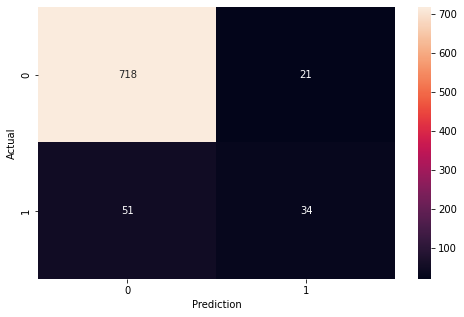

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrixRF, annot=True, fmt=".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

## Apakah model sudah baik?
confusion matrix dapat mengetahui keakuratan dari model yang kita buat dengan performance metrics seperti: accuracy, recall, dan precision.

In [25]:
from sklearn.metrics import classification_report
from sklearn import metrics
print (classification_report(y_cv, pred_cvRF))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       739
           1       0.62      0.40      0.49        85

    accuracy                           0.91       824
   macro avg       0.78      0.69      0.72       824
weighted avg       0.90      0.91      0.90       824

